In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:

class TreeNode:
    def __init__(self, data=None) -> None:
        self.children = []
        self.S = data
        self.M = np.mean(data, axis=0)

        self.r = None
        m = float("-inf")

        for s in self.S:
            dist = np.sqrt( s[0]**2 + s[1]**2)
            if dist > m:
                m = dist
        self.r = dist

    def add_child(self, node):
        self.children.append(node)

class knnTree:
    def __init__(self, l) -> None:
        self.l = 3
        self.tree_height = 0

        self.root = TreeNode()
    
    def build_tree(self, data, root=None, level=0):
        if level == self.l:
            return

        # cluster data in l parts
        kmeans = KMeans(n_clusters=self.l, random_state=0).fit(data)

        # recurse left, middle, right
        for i in range(self.l):
            cluster_indices = self._cluster_indices(i, kmeans.labels_)

            cluster_data = data[cluster_indices]
            new_node = TreeNode(cluster_data)
            if not root:
                self.root.add_child(new_node)
                self.build_tree(cluster_data, new_node, level+1)
            else:
                root.add_child(new_node)
                self.build_tree(cluster_data, new_node, level+1)
            
    
    def _cluster_indices(self, clustNum, labels_array): #numpy 
        return np.where(labels_array == clustNum)[0]



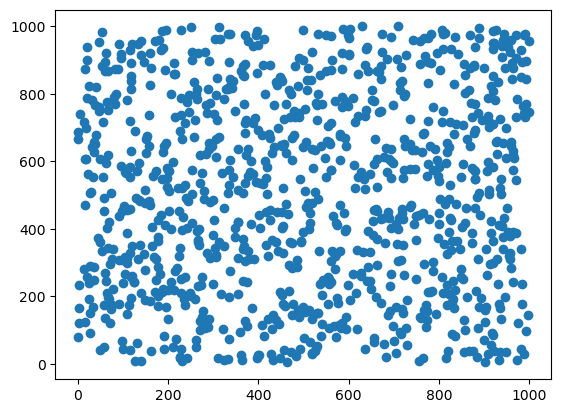

In [3]:
# Generate Points

x = np.random.randint(0, 1000, 1000)
y = np.random.randint(0, 1000, 1000)
plt.scatter(x, y)


In [4]:
# Preprocessing (Tree making)
l = 3
data = np.array(list(zip(x, y)))

tree = knnTree(l)
tree.build_tree(data)

AxisError: axis 0 is out of bounds for array of dimension 0

In [ ]:
tree.root.children

In [ ]:
# Step 0 - initializaiton

B = 0
L = 1
CURRENT_NODE = 0